# IMPORTACIONES


In [ ]:
import pandas as pd
import seaborn as sbn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# PREPROCESAMIENTO

Importación de los datos del dataset y Mostrar las primeras y últimas filas del dataframe y Mostrar las primeras y últimas filas del dataframe importado

In [ ]:
houses = pd.read_csv('/content/housing.csv', encoding='utf-8')
houses

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


Mostrar parámetros estadísticos de los datos


In [ ]:
houses.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Mostrar un mapa de calor que indique la correlación entre variables

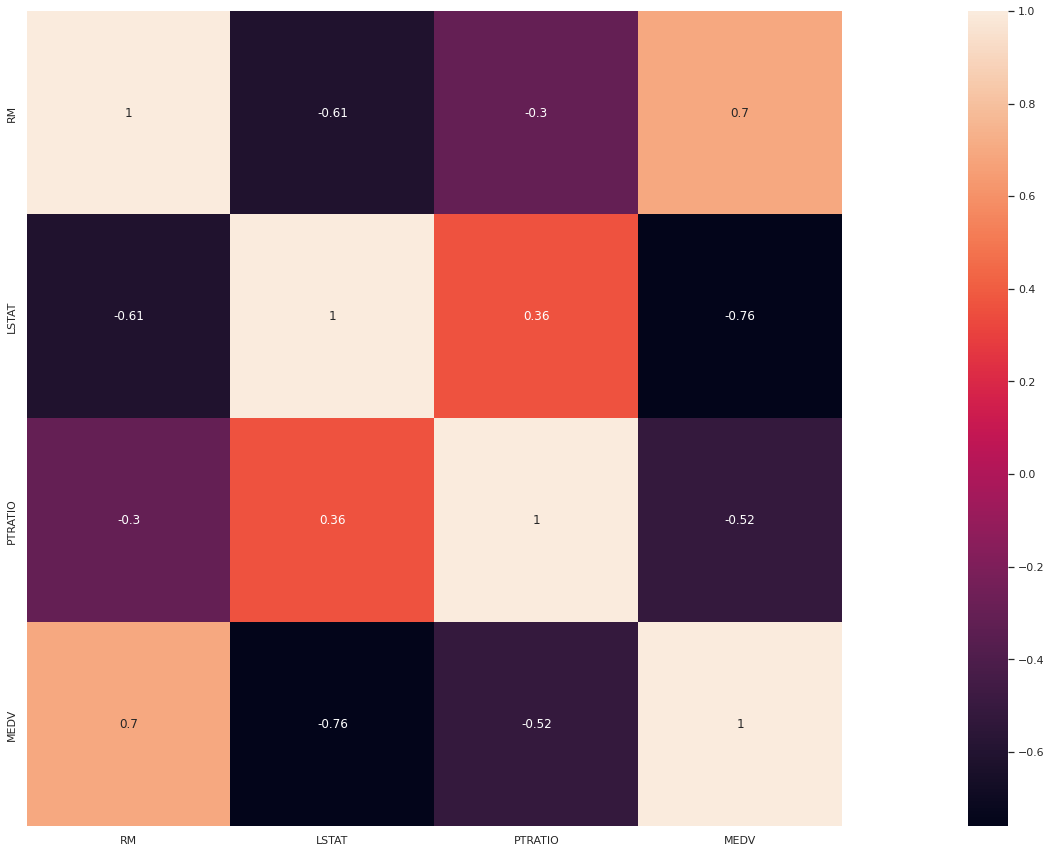

In [ ]:
sbn.set(rc = {'figure.figsize':(45,15)})
sbn.heatmap(houses.corr(), square=True, annot=True)

Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
x_house = houses.drop('MEDV', axis = 1)
y_house = houses['MEDV']
y_house

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_house,y_house, random_state=1, test_size=0.20)

# ENTRENAMIENTO Y PREDICCION

Probar distintas estimaciones para obtener el mejor resultado

In [ ]:
l_estimators = [2,4,8,16,32,64,128,256]
total_mae = []
for estimator in l_estimators:
  model = RandomForestRegressor(n_estimators = estimator, criterion='absolute_error', random_state=0)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  total_mae.append(mean_absolute_error(y_test,y_pred))

In [ ]:
total_mae

[55339.28571428572,
 54921.42857142857,
 54101.78571428572,
 50510.49107142857,
 48708.81696428572,
 48148.66071428572,
 48745.56361607143,
 49058.53794642857]

No handles with labels found to put in legend.


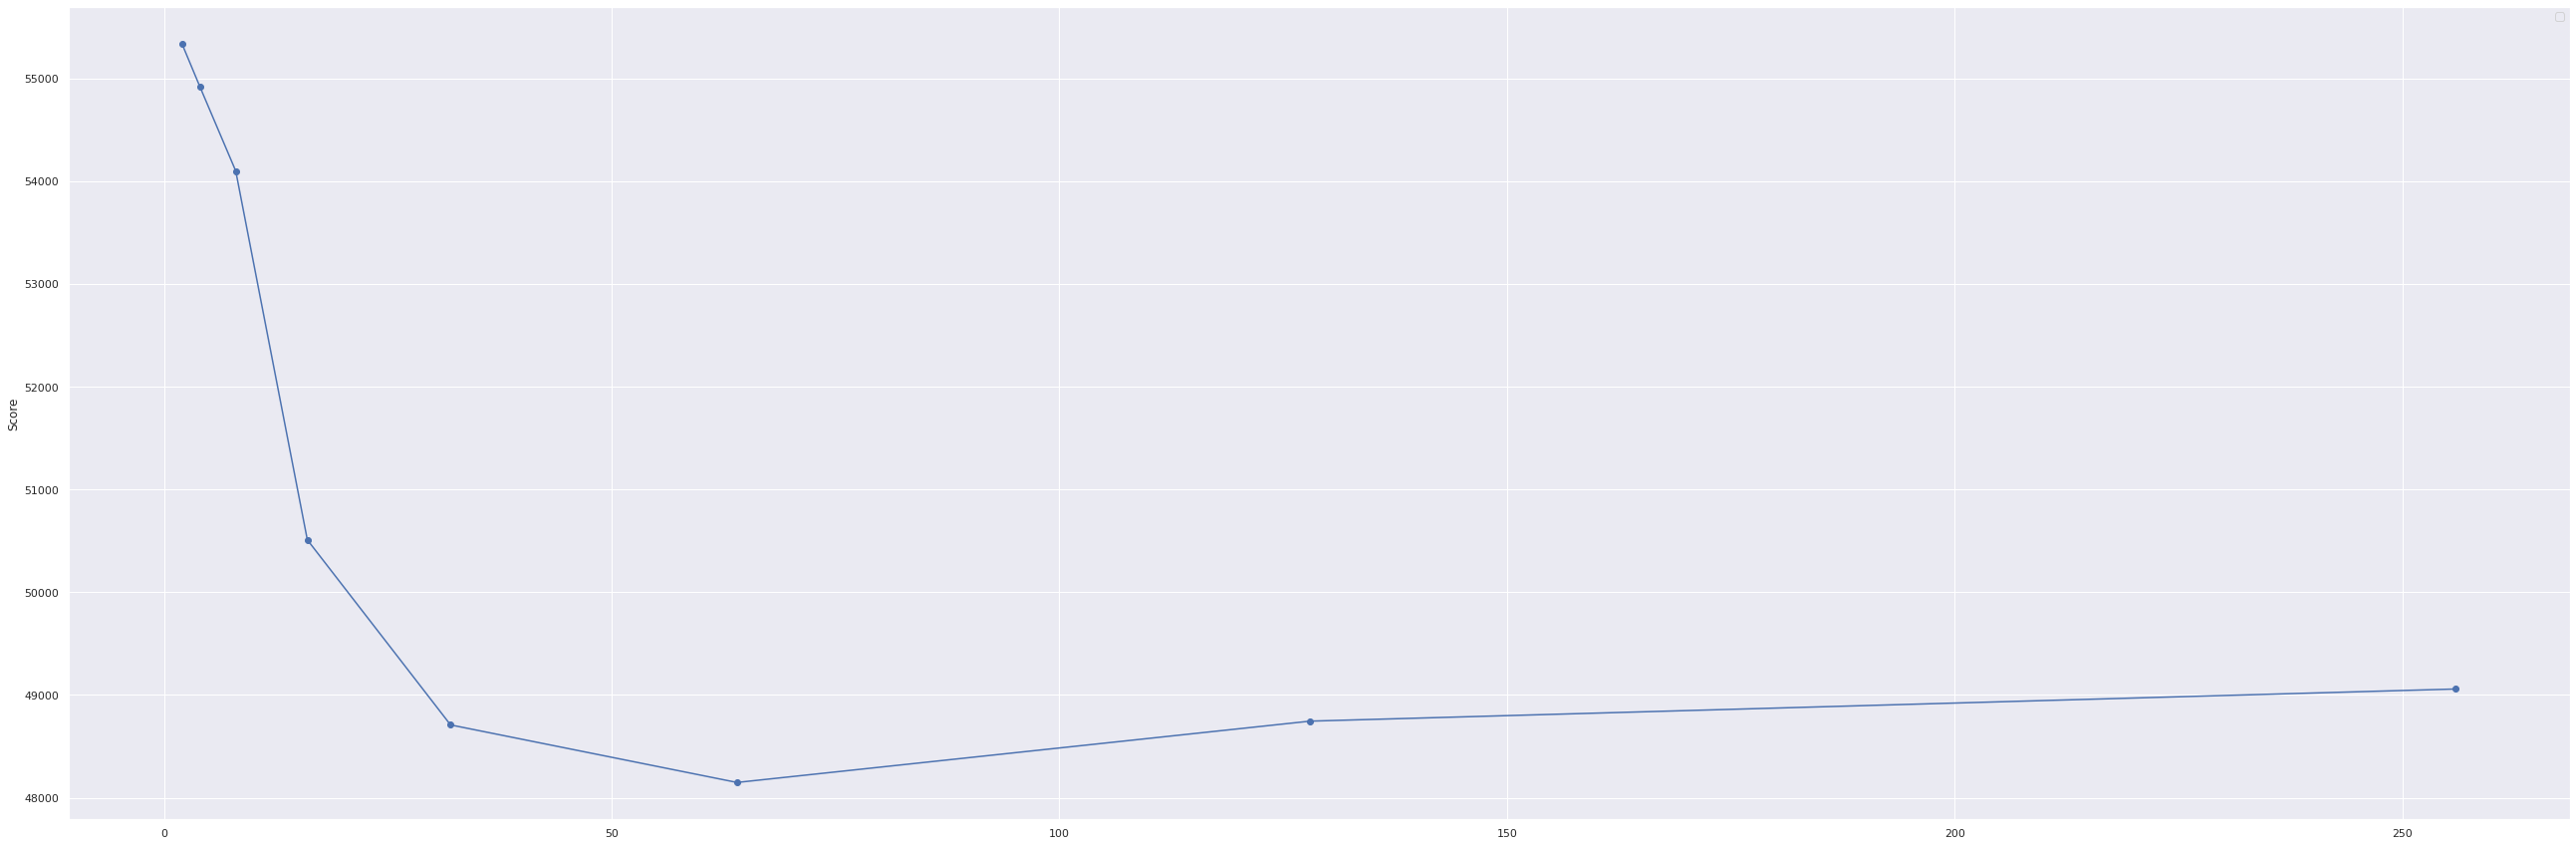

In [ ]:
plt.plot(l_estimators,total_mae,marker='o')
plt.ylabel('Score')

plt.legend()
plt.show()

In [ ]:
best_est = l_estimators[np.argmax(total_mae)]
best_score = min(total_mae)
print("Min value (estimator : %i, MAE: %6.2f" % (best_est, best_score))

Min value (estimator : 2, MAE: 48148.66


Elegir, instanciar (eligiendo unos valores concretos) y entrenar el modelo Y Realizar una predicción con los datos de prueba

In [ ]:
model = RandomForestRegressor(n_estimators = 2, criterion='absolute_error', random_state=0)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
score = mean_absolute_error(y_test,y_predict)
score

55339.28571428572

Importancia de las variables

In [ ]:
model.feature_importances_

array([0.42619314, 0.43260947, 0.1411974 ])

# Evaluacion

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


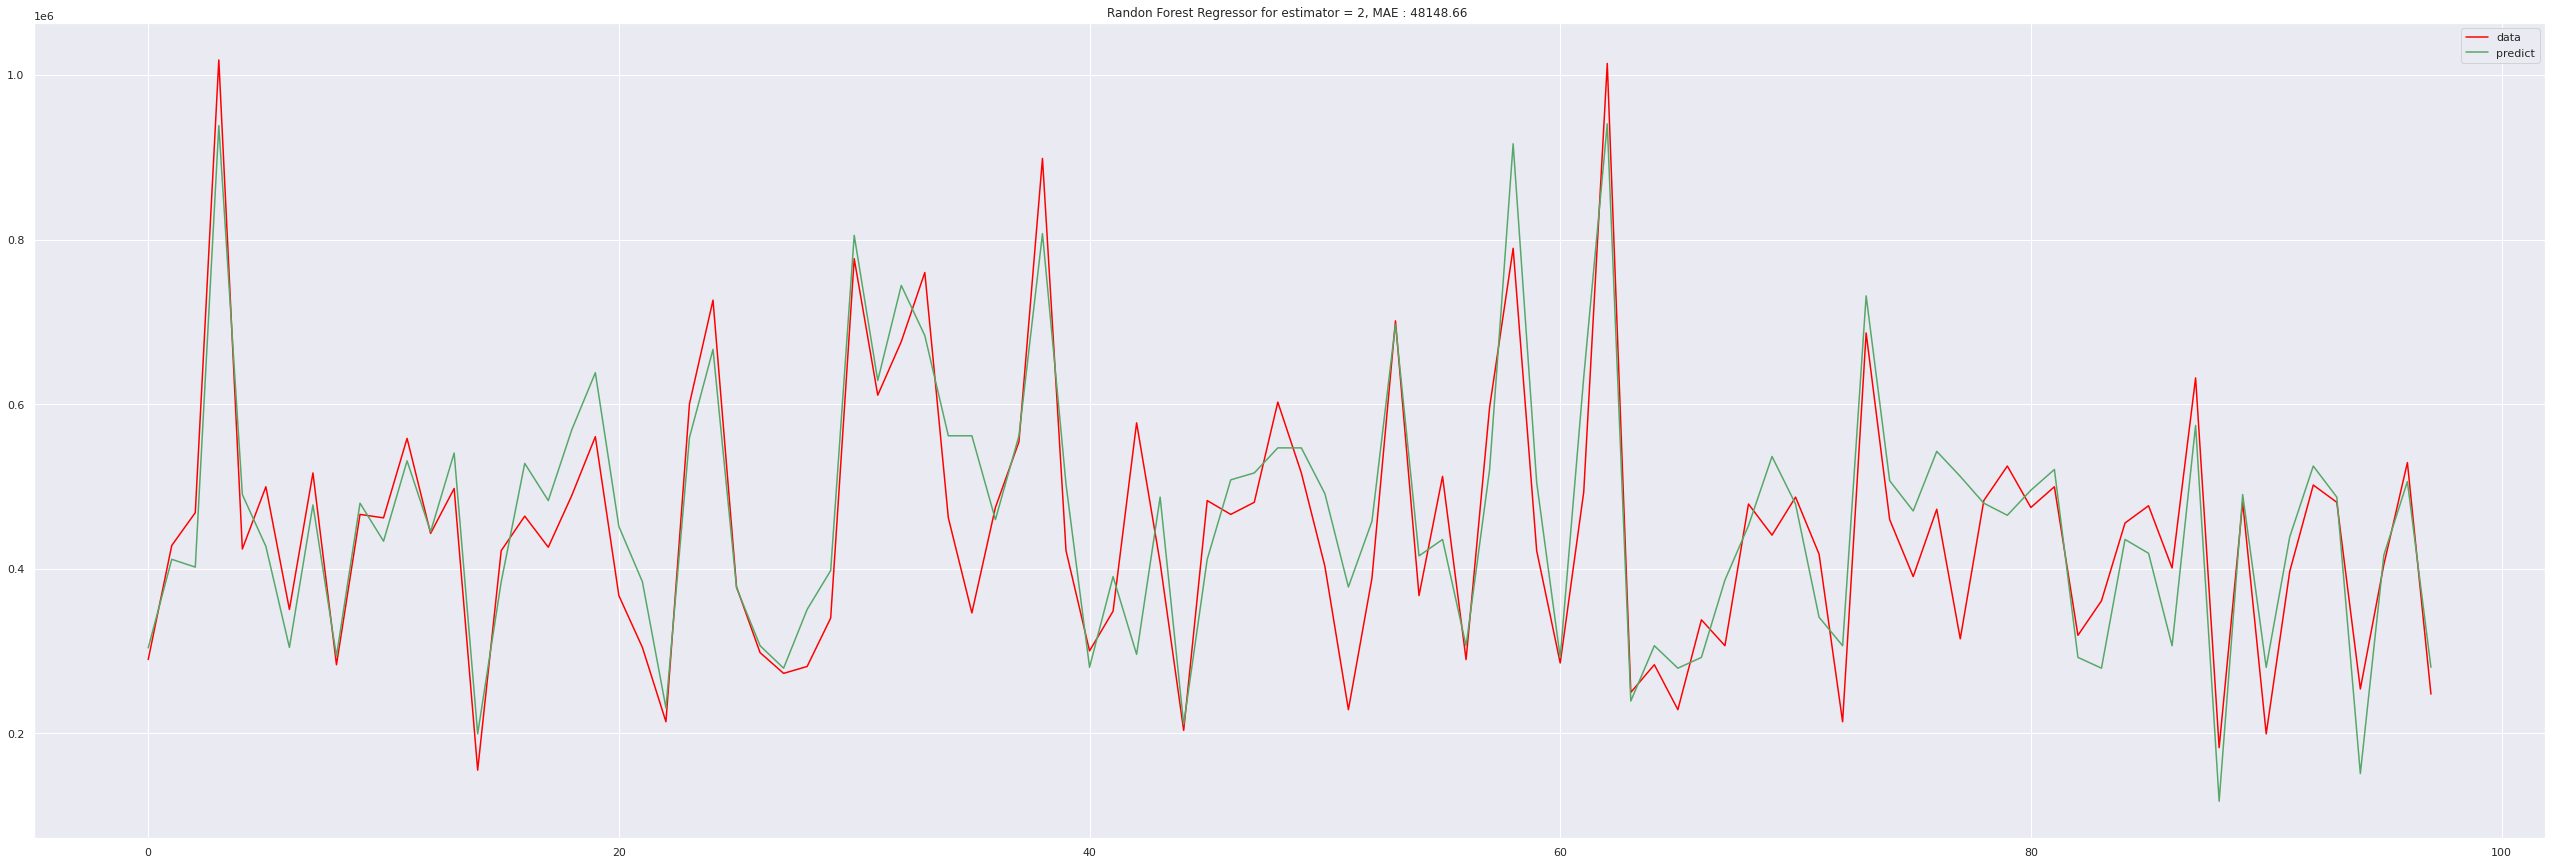

In [ ]:
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx,y_test,c='red', label = 'data')
plt.plot(xx, y_predict, c='g', label = 'predict')
plt.axis('tight')
plt.legend()
plt.title('Randon Forest Regressor for estimator = 2, MAE : 48148.66 ')

plt.show()

# OPTIMIZACION

In [ ]:
param_dist = {
    "n_estimators" : [2,4,6,10,12,14,16,18,20,22],
    "max_depth": [None,1,2,3,4,5,6,7,8,9],
    "max_features": ['auto', 'sqrt'],
    "bootstrap": [True,False] 
}

clasifier = RandomForestRegressor()
grid = GridSearchCV(estimator= clasifier, param_grid=param_dist, cv = 5)
grid.fit(x_train,y_train)
grid.best_estimator_


RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=18)

In [ ]:
best_grid = grid.best_estimator_
best_grid.fit(x_train, y_train)
y_pred_grid = best_grid.predict(x_test)
mae_grid = mean_absolute_error(y_test,y_pred_grid)
mae_grid

50180.58860508372